# Plotting graphs using many SNe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sncosmo
from bayesn import SEDmodel
import os
import pandas as pd
import math

## Generate a list of all SNe we have a file for

In [2]:
directory = os.fsencode("/root/partiiiproject/Archive")
supernovae_names = ["sn2006hb"]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".dat"): 
        supernovae_names.append(filename[:-4])
        continue
    else:
        continue

## Load Model

In [3]:
filter_yaml = "/root/partiiiproject/bayesn-filters/bayesn-filters/filters.yaml"
model_name = "W22_F19_model"
model = SEDmodel(load_model='W22_model', filter_yaml = filter_yaml)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /root/partiiiproject
Loading built-in model W22_model
Loading built-in reddening law F99


## Plotting redshift and distance

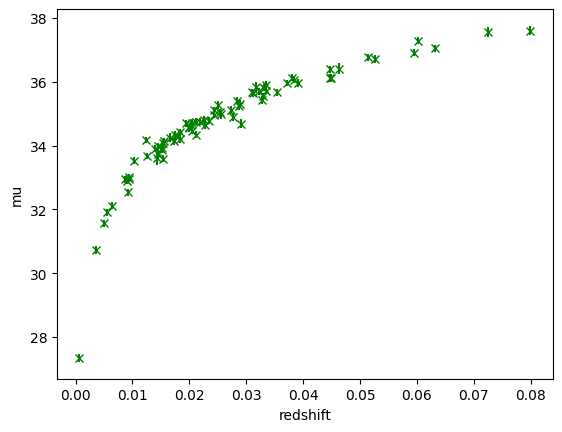

In [4]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        a=1
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

plt.xlabel('redshift')
plt.ylabel('mu')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftG23vsF99"+model_name+".png", bbox_inches='tight') 
plt.show()

## Plotting a graph of Rv and Av Values

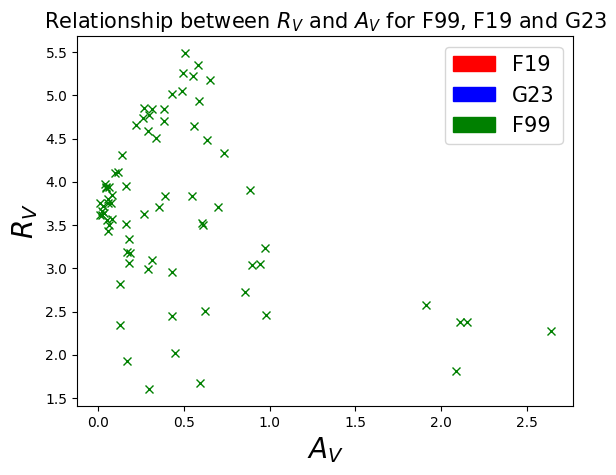

In [5]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV, RV, 'gx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        a=1
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV, RV, 'bx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV, RV, 'rx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

plt.xlabel(f'$A_V$',fontsize = 20)
plt.ylabel(f'$R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')
plt.legend(handles=[red_patch, blue_patch, green_patch],fontsize = 15)
plt.title(f"Relationship between $R_V$ and $A_V$ for F99, F19 and G23", fontsize = 15)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvAvAllSNe"+model_name+".png", bbox_inches='tight')
plt.show()

## Difference in Rv as a function of Av

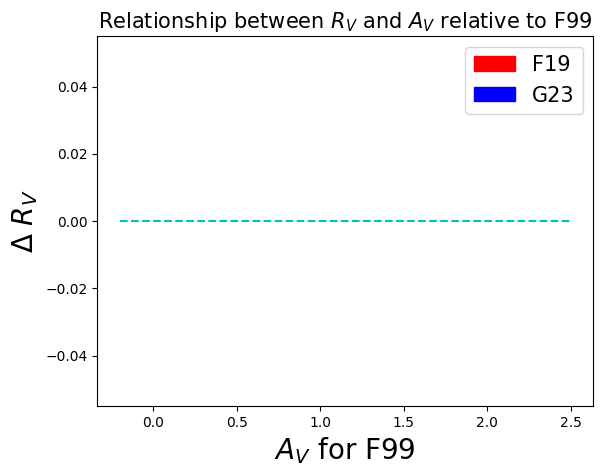

In [6]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F99 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV_F99 = samplesSummary.loc['AV[0]', 'mean']
        #plt.plot(AV, RV, 'gx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_G23 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV_F99, RV_G23-RV_F99, 'bx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F19 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV_F99, RV_F19-RV_F99, 'rx', label=dust_law)
        plt.plot([AV_F99, AV_F99], [RV_F19-RV_F99, RV_G23-RV_F99], 'k--')
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'$\Delta$ $R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')

plt.plot([-0.2,2.5], [0,0], 'c--')
plt.legend(handles=[red_patch, blue_patch],fontsize = 15)
plt.title(f"Relationship between $R_V$ and $A_V$ relative to F99",fontsize = 15)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvAvAllSNeRelative"+model_name+".png", bbox_inches='tight')
plt.show()

## Difference in mu values - Learned nothing!

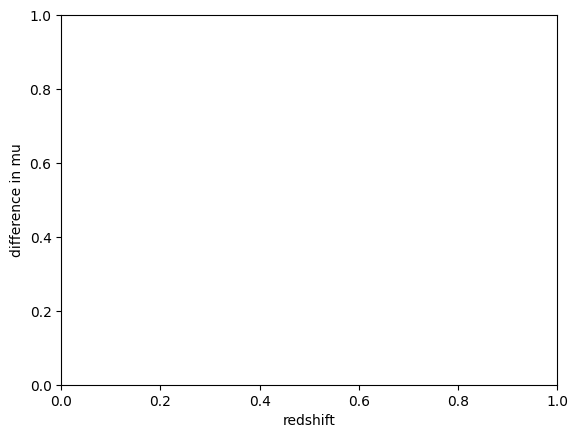

In [7]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu1-mu2, mu2_std+mu1_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue
        
plt.xlabel('redshift')
plt.ylabel('difference in mu')
#plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftdifferenceG23vsF99"+".png", bbox_inches='tight') 
plt.show()

## Difference of mu - with colour coding for Av values

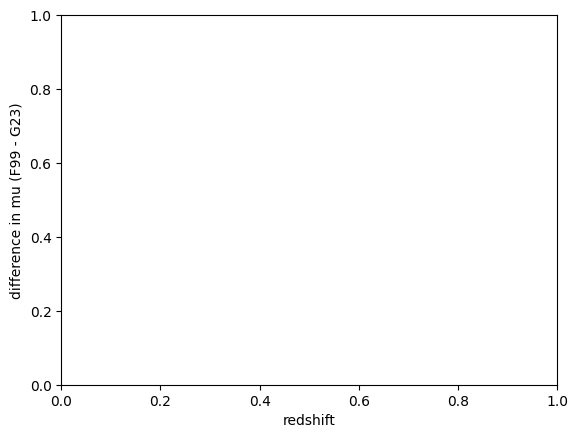

In [8]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        AV2 = samplesSummary.loc['AV[0]', 'mean']
        if 0<=AV2<=0.5:
            color = 'b'
        elif 0.5<=AV2<=1:
            color = 'g'
        elif 1<=AV2<=2:
            color = 'r'
        else:
            color = 'k'
        plt.errorbar(z, mu1-mu2, math.sqrt(mu2_std**2+mu1_std**2), fmt=f'{color}x', label=dust_law)
        plt.plot(z, mu1-mu2, f'{color}x', label=dust_law)
    except FileNotFoundError:
         continue

plt.xlabel('redshift')
plt.ylabel('difference in mu (F99 - G23)')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftdifferenceG23vsF99color"+model_name+".png", bbox_inches='tight') 
plt.show()

## Difference in mu against AV values for F99 law

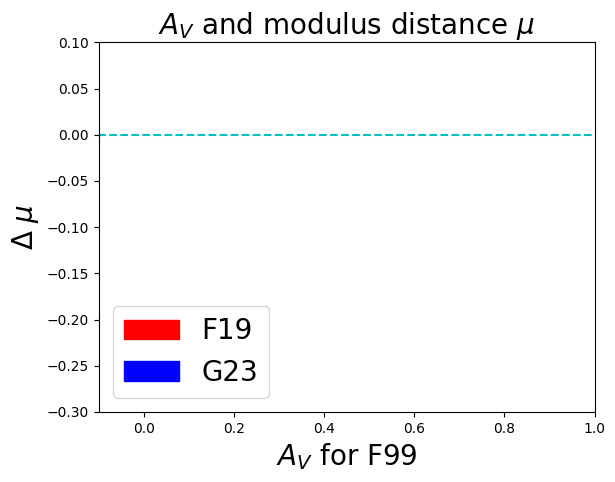

In [9]:
SN_with_AV = pd.DataFrame(columns = ["SNe names", "AV in F99"])

for supernova_name_index, supernova_name in enumerate(supernovae_names):
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
        AV1 = samplesSummary.loc['AV[0]', 'mean']

        #SN with AV in F99
        SN_with_AV.at[supernova_name_index, "SNe names"] = supernova_name
        SN_with_AV.at[supernova_name_index, "AV in F99"] = AV1
    
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        #plt.errorbar(AV2, mu1-mu2, math.sqrt(mu2_std**2+mu1_std**2), fmt=f'{color}x', label=dust_law)
        plt.plot(AV1, mu1-mu2, f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu3 = samplesSummary.loc['mu[0]', 'mean']
        mu3_std = samplesSummary.loc['mu[0]', 'sd']
        plt.plot(AV1, mu1-mu3, f'rx', label=dust_law)
        plt.plot([AV1, AV1], [mu1-mu2, mu1-mu3], 'k--')
    except FileNotFoundError:
         continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'$\Delta$ $\mu$',fontsize = 20)
plt.plot([-0.2,9], [0,0], 'c--')
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
plt.legend(handles=[red_patch, blue_patch],fontsize = 20)
plt.xlim(-0.1,1)
plt.ylim(-0.3,0.1)
plt.title(f'$A_V$ and modulus distance $\mu$',fontsize = 20)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distancedifferencesWithAVG23vsF99colorZoomed"+model_name+".png", bbox_inches='tight') 
plt.show()

## List of SNe ordered by Av in F99

In [10]:
print(SN_with_AV.sort_values("AV in F99"))

   SNe names AV in F99
70  sn2006is     0.009
66  sn2008cf      0.01
73  sn2008fr     0.021
72  sn2008bf     0.025
53  sn2008hv     0.031
..       ...       ...
47   sn2009I     1.914
35   sn2014J     2.084
36   sn2005A     2.109
55  sn2006br     2.153
59   sn2006X     2.638

[76 rows x 2 columns]


## Plotting redshift against Av

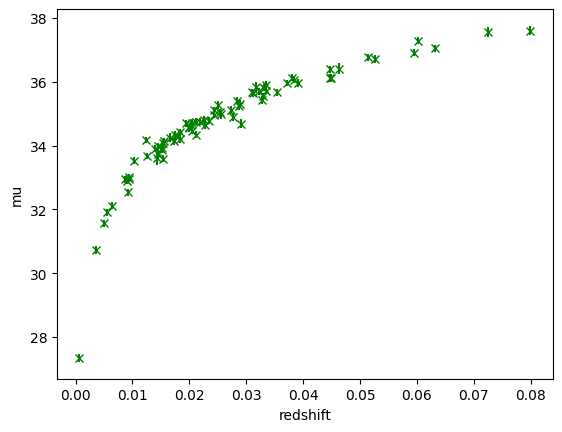

In [11]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        a=1
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

    dust_law = "F19"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'rx', label=dust_law)
    except FileNotFoundError:
        a=1

plt.xlabel('redshift')
plt.ylabel('mu')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftG23vsF99"+model_name+".png", bbox_inches='tight') 
plt.show()

In [12]:
## Version with Std

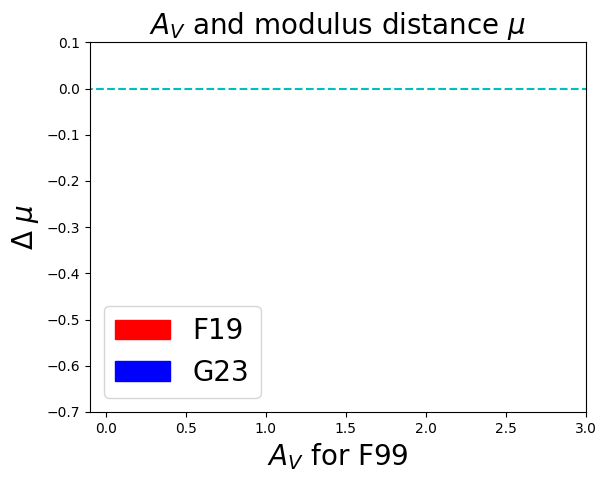

In [13]:
SN_with_AV = pd.DataFrame(columns = ["SNe names", "AV in F99"])

for supernova_name_index, supernova_name in enumerate(supernovae_names):
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
        AV1 = samplesSummary.loc['AV[0]', 'mean']

        #SN with AV in F99
        SN_with_AV.at[supernova_name_index, "SNe names"] = supernova_name
        SN_with_AV.at[supernova_name_index, "AV in F99"] = AV1
    
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(AV1, mu1-mu2, math.sqrt(mu2_std**2+mu1_std**2), fmt=f'bx', label=dust_law)
        #plt.plot(AV1, mu1-mu2, f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu3 = samplesSummary.loc['mu[0]', 'mean']
        mu3_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(AV1, mu1-mu3, math.sqrt(mu3_std**2+mu1_std**2), fmt=f'rx', label=dust_law)
        #plt.plot(AV1, mu1-mu3, f'rx', label=dust_law)
        plt.plot([AV1, AV1], [mu1-mu2, mu1-mu3], 'k--')
    except FileNotFoundError:
         continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'$\Delta$ $\mu$',fontsize = 20)
plt.plot([-0.2,9], [0,0], 'c--')
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
plt.legend(handles=[red_patch, blue_patch],fontsize = 20)
plt.xlim(-0.1,3)
plt.ylim(-0.7,0.1)
plt.title(f'$A_V$ and modulus distance $\mu$',fontsize = 20)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distancedifferencesWithAVG23vsF99colorWithStd"+model_name+".png", bbox_inches='tight') 
plt.show()

## Standard deviation in Rv and Av

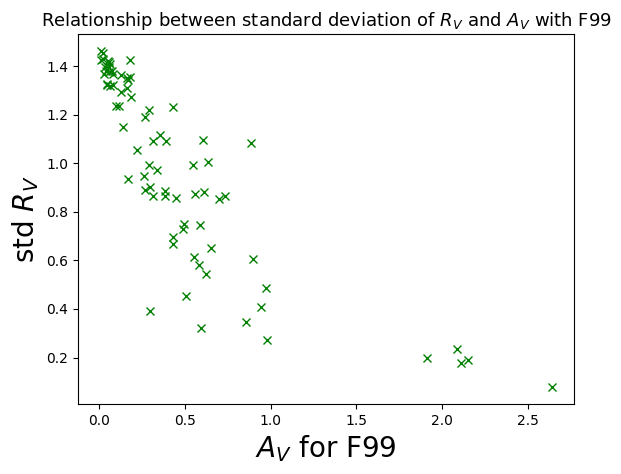

In [14]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F99 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV_F99 = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV_F99, RV_std, 'gx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_G23 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        #plt.plot(AV_F99, RV_G23-RV_F99, 'bx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F19 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        #plt.plot(AV_F99, RV_F19-RV_F99, 'rx', label=dust_law)
        #plt.plot([AV_F99, AV_F99], [RV_F19-RV_F99, RV_G23-RV_F99], 'k--')
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'std $R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')

#plt.plot([-0.2,2.5], [0,0], 'c--')
#plt.legend(handles=[red_patch, blue_patch],fontsize = 15)
plt.title(f"Relationship between standard deviation of $R_V$ and $A_V$ with F99",fontsize = 13)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvStd"+model_name, bbox_inches='tight')
plt.show()

## Comparing the models

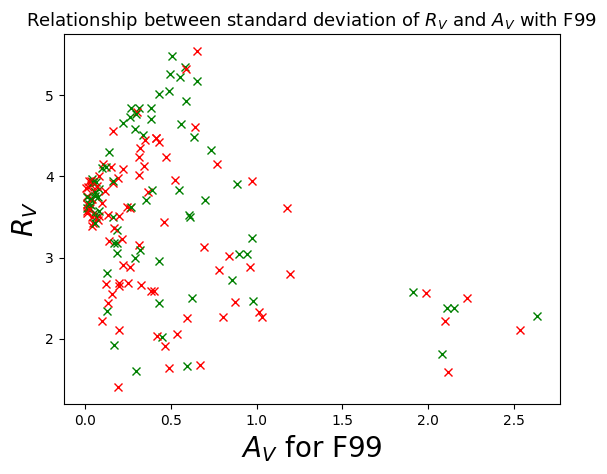

In [15]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
        
    colorScheme = ["r","g"]
    for index, model_name in enumerate(["","W22_F19_model"]):
        dust_law = "F99"
        sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
        try:
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            RV_F99 = samplesSummary.loc['RV[0]', 'mean']
            RV_std = samplesSummary.loc['RV[0]', 'sd']
            AV_F99 = samplesSummary.loc['AV[0]', 'mean']
            plt.plot(AV_F99, RV_F99, colorScheme[index]+'x', label=dust_law)
            #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
        except FileNotFoundError:
            continue
        
        dust_law = "G23"
        try:
            sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            RV_G23 = samplesSummary.loc['RV[0]', 'mean']
            RV_std = samplesSummary.loc['RV[0]', 'sd']
            AV = samplesSummary.loc['AV[0]', 'mean']
            #plt.plot(AV_F99, RV_G23-RV_F99, 'bx', label=dust_law)
            #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
        except FileNotFoundError:
             continue
    
        dust_law = "F19"
        try:
            sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            RV_F19 = samplesSummary.loc['RV[0]', 'mean']
            RV_std = samplesSummary.loc['RV[0]', 'sd']
            AV = samplesSummary.loc['AV[0]', 'mean']
            #plt.plot(AV_F99, RV_F19-RV_F99, 'rx', label=dust_law)
            #plt.plot([AV_F99, AV_F99], [RV_F19-RV_F99, RV_G23-RV_F99], 'k--')
            #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
        except FileNotFoundError:
             continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'$R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')

#plt.plot([-0.2,2.5], [0,0], 'c--')
#plt.legend(handles=[red_patch, blue_patch],fontsize = 15)
plt.title(f"Relationship between standard deviation of $R_V$ and $A_V$ with F99",fontsize = 13)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvModelComparison", bbox_inches='tight')
plt.show()

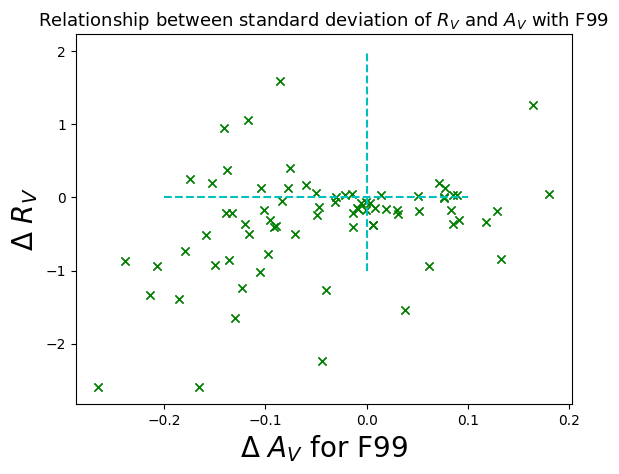

In [16]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
        
    colorScheme = ["r","g"]
    for index, model_name in enumerate(["","W22_F19_model"]):
        dust_law = "F99"
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        try:
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            RV_F991 = samplesSummary.loc['RV[0]', 'mean']
            RV_std = samplesSummary.loc['RV[0]', 'sd']
            AV_F991 = samplesSummary.loc['AV[0]', 'mean']
            #plt.plot(AV_F99, RV_F99, colorScheme[index]+'x', label=dust_law)
            #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
        except FileNotFoundError:
            continue

        dust_law = "F99"
        sampleSummaryDir = "DustLawsFitOfAllSamplesW22_F19_model/"+supernova_name + dust_law + "_fit_summary.csv"
        try:
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            RV_F992 = samplesSummary.loc['RV[0]', 'mean']
            RV_std = samplesSummary.loc['RV[0]', 'sd']
            AV_F992 = samplesSummary.loc['AV[0]', 'mean']
            plt.plot(AV_F991-AV_F992, RV_F991-RV_F992, 'gx', label=dust_law)
            #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
        except FileNotFoundError:
            continue
        
        dust_law = "G23"
        try:
            sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            RV_G23 = samplesSummary.loc['RV[0]', 'mean']
            RV_std = samplesSummary.loc['RV[0]', 'sd']
            AV = samplesSummary.loc['AV[0]', 'mean']
            #plt.plot(AV_F99, RV_G23-RV_F99, 'bx', label=dust_law)
            #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
        except FileNotFoundError:
             continue
    
        dust_law = "F19"
        try:
            sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
            samplesSummary = pd.read_csv(sampleSummaryDir)
            samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
            RV_F19 = samplesSummary.loc['RV[0]', 'mean']
            RV_std = samplesSummary.loc['RV[0]', 'sd']
            AV = samplesSummary.loc['AV[0]', 'mean']
            #plt.plot(AV_F99, RV_F19-RV_F99, 'rx', label=dust_law)
            #plt.plot([AV_F99, AV_F99], [RV_F19-RV_F99, RV_G23-RV_F99], 'k--')
            #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
        except FileNotFoundError:
             continue

plt.xlabel(f'$\Delta$ $A_V$ for F99',fontsize = 20)
plt.ylabel(f'$\Delta$ $R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')

plt.plot([-0.2,0.1], [0,0], 'c--')
plt.plot([0,0], [-1,2], 'c--')
#plt.legend(handles=[red_patch, blue_patch],fontsize = 15)
plt.title(f"Relationship between standard deviation of $R_V$ and $A_V$ with F99",fontsize = 13)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvDirectModelComparison", bbox_inches='tight')
plt.show()